## Pandas vs. Xlwings

> 方法1：使用Xlwings读Range的数据进行操作，显然这种方式要使用for循环反复的引用range对象，使得在计算的过程中这是非常耗时的。
> 
> 方法2：使用Xlwings将数据一次性读入python的List中，在List中进行计算返回结果，这样的操作方式避免了大量引用range对象，减少了耗时，当然了数量量很大的时候也就对设备的内存提出了新的要求。
> 
> 方法3：使用VBA进行操作。VBA是Visual Basic的一种宏语言，是在其桌面应用程序中执行通用的自动化(OLE)任务的编程语言。跟使用使用第三方库不一样的是，VBA操作的时候是基于更加底层的接口来实现的，所以从这个角度来看，这种方式是肯定比方法1快的。
> 
> 方法4：当然了，我们知道xlwings是支持pandas的对象的，因此我们也可以使用pandas来进行处理，毕竟pandas是处理数据的神器，而且pandas处理大量的数据也有其独有的优势，这是值得我们注意的。
> 
> 不管哪种方式，都是解决问题的方式，都值得我们在平时的学习中进行总结和归纳，感兴趣的小伙伴可以生成数据实时这几种方式到底哪种更优哦。

## pandas

In [167]:
df_dict=pd.read_excel('./合并2.xls',sheet_name=None,header=None)

<IPython.core.display.Javascript object>

In [168]:
df_dict.keys()

dict_keys(['蒲重庆', '蒲万生', '蒲彦忠', '杨智军', '陈永平', '蒲子和', '陈永春', '蒲三义', '蒲彦荣', '蒲荣江', '蒲虽珍', '蒲处求', '张海兰', '蒲来录', '蒲胜仓', '蒲三歹', '蒲保录 (2)', '蒲双义', '马保平', '李白娃', '蒲致合', '蒲孝恩', '蒲五世', '蒲光武', '巩平福', '蒲利国', '蒲新发', '蒲存兵', '蒲承刚', '李军民', '蒲会恩', '杨东生', '巩林平', '蒲东生', '杨建昌', '杨银生', '马宗录', '蒲新义', '蒲国如', '蒲田录', '蒲恒康', '张志兵', '蒲勤录', '杨会仓', '蒲粉梅', '蒲彦学', '马宗林', '蒲春生', '蒲瑞平', '雷彩彩', '蒲清杰', '蒲长成', '杨成宝', '蒲新福 (2)', '李引梅', '杨长生', '蒲应启', '蒲志明', '蒲平', '蒲晓阳', '蒲新福1', '蒲小刚', '蒲瑞东', '蒲奎文', '蒲彦军', '汪米歹', '蒲文中', '赵秀英', '蒲开洲', '蒲英杰', '蒲耿强', '蒲小强', '谢玉兰', '蒲祥林', '蒲彦文', '蒲荣生', '蒲国庆', '杨应恩', '蒲青为', '蒲存民', '蒲怀庭', '蒲利军', '蒲集荣', '杨海锋', '张香英', '蒲育强', '蒲保安', '缑茸茸', '常连子', '蒲具庆', '蒲建平 (2)', '蒲承明', '陈维国', '蒲小军', '蒲金平 (2)', '蒲敏生', '蒲文华', '蒲彦虎', '蒲保军', '李见平', '蒲成来', '吴勤学', '蒲桂香', '蒲玉录', '蒲顺仓', '蒲天存', '蒲军刚', '蒲新茂', '巩平定', '蒲保生', '蒲明录', '杨军民', '蒲瑞琨', '蒲瑞东1', '年秀芳', '蒲建平1', '蒲彦文1', '马保山', '蒲玉明', '蒲文峰', '蒲建刚', '蒲耒康', '蒲福录', '蒲奎绪', '缑芳娥', '蒲国平', '杨富荣', '蒲秀平', '蒲福民', '杨毅凡', '蒲保成', '马存林', '徐桂芳', '蒲居正', '高彩梅', '杨富强', '吴勤兵', '蒲勤生', '杨荣生

In [242]:
writer = pd.ExcelWriter('./output.xlsx')
for sheet_name,df in df_dict.items():
    df.iloc[:,0]=df.iloc[:,0].fillna(method='ffill').str.replace('\n','')
    df=df.replace([' \n',np.nan,'\s'],'')
    droplist=df.iloc[2:,3][(df.iloc[2:,3]=='')].index|df.iloc[2:,3][(df.iloc[2:,3]=='\n')].index
    df=df.drop(droplist,axis=0)
    df=df.reset_index(drop=True) 
    df.iloc[4:,1]=df.index[4:]-3
    print(sheet_name+'finished')
    df.to_excel(writer,sheet_name,index=False,header=False)
writer.save()

<IPython.core.display.Javascript object>

蒲重庆finished
蒲万生finished
蒲彦忠finished
杨智军finished
陈永平finished
蒲子和finished
陈永春finished
蒲三义finished
蒲彦荣finished
蒲荣江finished
蒲虽珍finished
蒲处求finished
张海兰finished
蒲来录finished
蒲胜仓finished
蒲三歹finished
蒲保录 (2)finished
蒲双义finished
马保平finished
李白娃finished
蒲致合finished
蒲孝恩finished
蒲五世finished
蒲光武finished
巩平福finished
蒲利国finished
蒲新发finished
蒲存兵finished
蒲承刚finished
李军民finished
蒲会恩finished
杨东生finished
巩林平finished
蒲东生finished
杨建昌finished
杨银生finished
马宗录finished
蒲新义finished
蒲国如finished
蒲田录finished
蒲恒康finished
张志兵finished
蒲勤录finished
杨会仓finished
蒲粉梅finished
蒲彦学finished
马宗林finished
蒲春生finished
蒲瑞平finished
雷彩彩finished
蒲清杰finished
蒲长成finished
杨成宝finished
蒲新福 (2)finished
李引梅finished
杨长生finished
蒲应启finished
蒲志明finished
蒲平finished
蒲晓阳finished
蒲新福1finished
蒲小刚finished
蒲瑞东finished
蒲奎文finished
蒲彦军finished
汪米歹finished
蒲文中finished
赵秀英finished
蒲开洲finished
蒲英杰finished
蒲耿强finished
蒲小强finished
谢玉兰finished
蒲祥林finished
蒲彦文finished
蒲荣生finished
蒲国庆finished
杨应恩finished
蒲青为finished
蒲存民finished
蒲怀庭finished
蒲利军finished
蒲集荣finis

In [209]:
df.to_excel('output.xls',index=False,header=False,merge_cells=True)

In [243]:
!open 'output.xlsx'

In [248]:
df=pd.read_excel('./output.xlsx',sheet_name=None,header=None)

<IPython.core.display.Javascript object>

In [251]:
df['蒲重庆'].replace(np.nan,'')

,0,1,2,3,4,5,6
0,麦积区精准扶贫到户政策落实清单,,,,,,
1,中滩 镇 蒲甸 村 一 组,,,,,,
2,户主姓名,,蒲重庆,建档立卡年份,2013年,脱贫年份,2014年
3,政策类别,序号,享受具体政策,享受年度及资金,,,
4,教育扶贫,1,义务教育阶段家庭经济困难学生生活费补助,1.蒲嘉栋于2019年享受经济困难学生生活补助费312.50元。\n2.蒲嘉彤于2019年享...,,,
5,教育扶贫,2,普通高中免学杂费,蒲嘉敏于2020年享受普通高中免学杂费 460 元。,,,
6,教育扶贫,3,普通高中助学金,蒲嘉敏于2020年享受普通高中助学金 1000 元。,,,
7,健康扶贫,4,参保缴费补贴,2018年7人享受参保缴费补贴 210元。2019年9人享受参保缴费补贴 720元。2020...,,,
8,健康扶贫,5,慢性病家庭医生\n签约服务,1.落实了慢性病家庭医生签约服务，签约医生张华；2.为田连桂办理了高血压Ⅱ级、慢阻肺慢病卡。,,,
9,就业扶贫,6,参加招聘会或得到过政策咨询、职业指导、岗位信息推荐等就业服务,2019年、2020年得到过政策咨询(职业指导、岗位信息推荐)等就业服务。,,,


## xlwing 

In [1]:
import xlwings as xw 

### 创建新的Excel文件

#### 方法1：# 创建一个新的App，并在新App中新建一个Book4

In [ ]:
wb = xw.Book()
wb.save('1.xlsx')
wb.close()

#### 方法2：# 当前App下新建一个Book

In [ ]:
# visible参数控制创建文件时可见的属性
app=xw.App(visible=False,add_book=False)
wb=app.books.add()
wb.save('1.xlsx')
wb.close()
app.quit() #结束进程

### 打开已有的Excel文件

In [ ]:
import xlwings as xw
app=xw.App(visible=True,add_book=False)
app.display_alerts=False   #不显示Excel消息框
app.screen_updating=False  #关闭屏幕更新,可加快宏的执行速度

In [ ]:
wb=app.books.open('1.xlsx')
# print(wb.fullname)       # 输出打开的excle的绝对路径
wb.save()
wb.close()
app.quit()  # 退出excel程序，
# app.kill() 通过杀掉进程强制Excel app退出

In [ ]:
# 以第一种方式创建Book时，打开文件的操作可如下
wb = xw.Book('output.xlsx')

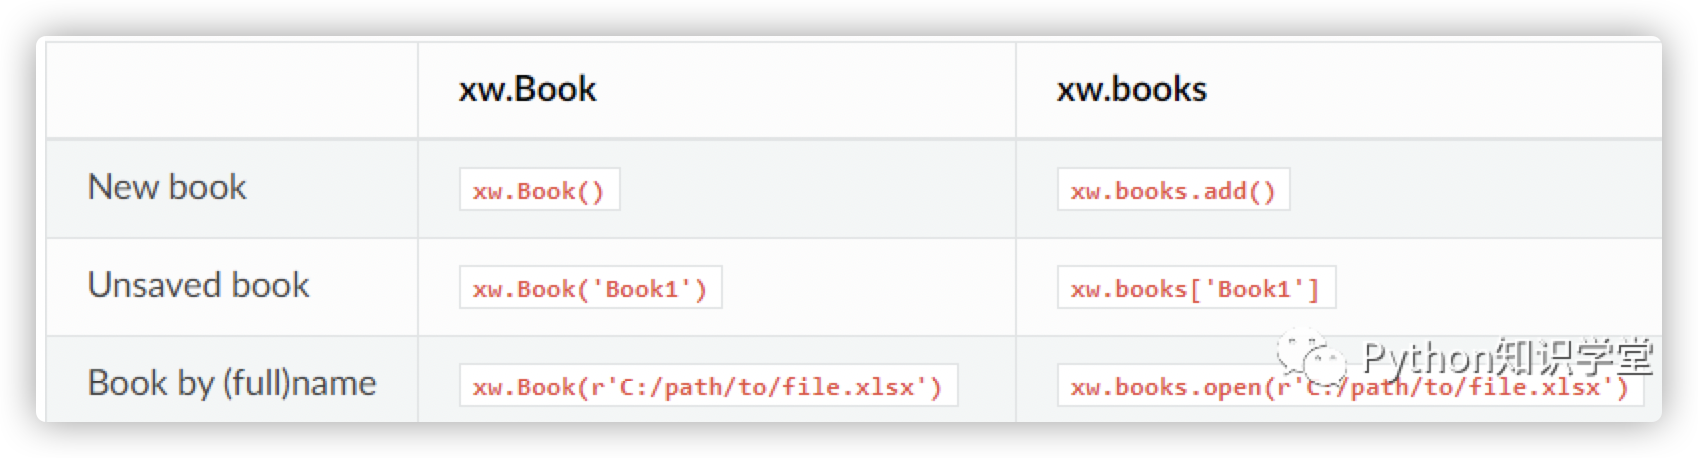

**建议使用：xw.Book('filename.xlsx') 来打开工作薄或引用工作簿，不容易出错**

In [2]:
wb = xw.Book('./output.xlsx')

In [3]:
wb2 = xw.Book('./output.xls')
# wb3 = xw.Book('./3.xls')
# wb4 = xw.Book('./4.xls')
# wb5 = xw.Book('./5.xls')

In [4]:
wb.sheets.count #sheet数目

255

In [5]:
wb.sheets[0].range('a3:g4').value # cells值显示

[['户主姓名', None, '蒲重庆', '建档立卡年份', '2013年', '脱贫年份', '2014年'],
 ['政策类别', '序号', '享受具体政策', '享受年度及资金', None, None, None]]

In [19]:
ws=wb.sheets[0]

In [7]:
ws.range ('A1:D15').autofit()     # 自动调整范围内所有单元格的宽度和高度。

In [8]:
ws.range('A1:D15').rows.autofit()  # 如果仅自动调整行的高度，使用 

In [14]:
wb2.sheets[0].range ('A1').end('down')  # 返回一个Range对象，该对象表示包含源范围的区域末尾的单元格

<Range [output.xls]Sheet1!$A$13>

In [22]:
ws.range ('A19').formula='=SUM(B1:B5)'  # 设置A9单元格公式计算的值

In [24]:
print(ws.range ('A19').formula )

=SUM(B1:B5)


### xw.Book方法和属性

In [ ]:
xw.Book.activate(steal_focus=True)   # True则激活最前面的窗口，并将焦点从python移交给excel
xw.Book.app                          # 获取创建工作簿的app对象
xw.Book.caller()                     # 当通过RunPython从Excel调用Python函数时引用调用的工作簿
xw.Book.set_mock_caller()            # 设置当前工作薄为Python代码的调用者即set_mock_caller让Python知道谁是调用者
xw.Book.close()                      # 关闭工作簿而不进行保存
xw.Book.selection                    # 返回选定的单元格作为Range
xw.Book.macro()                      # 在Excel VBA中运行Sub或Function
xw.Book.name                         # 返回工作簿的名称
xw.Book.names                        # 返回一个名称集合
xw.Book.save(path=None)              # 保存工作簿，可传入保存路径，同名会直接覆盖
xw.Book.sheets                       # 返回表示工作簿中所有工作表的工作表集

### xw.Range方法和属性

In [25]:
xw.Range('A1')      # xw.Range('A1')                    

<Range [output.xls]Sheet1!$A$1>

In [31]:
xw.Range ('a1:b2').value      # 引用区域并取值，输出[[1.0, 9.0],[2.0, 10.0]]，以二元list形式

[['麦积区精准扶贫到户政策落实清单', None], ['     中滩     镇     蒲甸    村  六 组', None]]

In [28]:
# 与上述等效
xw.Range ((1,1), (2,2)).value   

[['麦积区精准扶贫到户政策落实清单', None], ['     中滩     镇     蒲甸    村  六 组', None]]

In [32]:
# 添加超链接
xw.Range ('A20').add_hyperlink(address='www.baidu.com') 

In [33]:
xw.Range ('A19').clear()       # 清除所选择单元格的内容和格式，可选择范围

In [34]:
xw.Range ('A20').clear_contents()  # 清除范围的内容，但保留格式。

In [35]:
xw.Range ('A1').color         #获取A1单元格的背景色。

In [37]:
xw.Range ('A1').color = (255,0,255)  #设置A1单元格的背景色，RGB颜色

In [38]:
xw.Range ('A1').color = None  #删除背景色

In [39]:
xw.Range ('B1:C4').column     # 返回所选范围第一列的列标，此处输出2

2

In [40]:
xw.Range ('B2:C4').row        # 返回所选范围第一行的行标，此处输出2

2

In [41]:
xw.Range ('A1:B2').count      # 返回所选范围单元格数量，此处输出4

4

In [42]:
xw.Range ('A1').current_region  # 此属性返回一个Range对象，该对象表示由（但不包括）空白行和空白列或工作表的边缘的任意组合限制的范围，好比是一片连接的区域

<Range [output.xls]Sheet1!$A$1:$G$13>

In [43]:
xw.Range ('A1').delete()      # 删除单元格A1,有参数left和up，如delete('up')。如果省略，Excel将根据范围的形状进行决定。

In [50]:
# 以指定的格式返回范围的地址
xw.Range ('A1:B2').get_address(external=True)  
#参数：
#row_absolute(bool ,默认为True)–设置为True可以将引用的行部分作为绝对引用返回。#column_absolute(bool,默认为True)–设置为True可以将引用的列部分作为绝对引用返回。
#include_sheetname(bool ,默认为False)–设置为True可以在地址中包含工作表名称。
#external(bool ,默认为False)–设置为True以返回带有工作簿和工作表名称的外部引用。
#具体的情况大家可以传入几个参数试试

'[output.xls]Sheet1!$A$1:$B$2'

In [46]:
xw.Range ('A1:B2').height     # 返回单元格(范围)的高度
xw.Range ('A1:B2').width      # 返回范围的宽度

130.0

In [48]:
xw.Range ('B2:C4').row_height      # 获取范围的高度（以磅为单位）

15.0

In [47]:
xw.Range ('B2:C4').row_height = 15 # 设置范围的高度（以磅为单位）

In [52]:
xw.Range ('B2:C4').rows        # 返回一个RangeRows对象，该对象表示指定范围内的行。

RangeRows(<Range [output.xls]Sheet1!$B$2:$C$4>)

In [53]:
xw.Range ('B2:C4').columns     # 返回一个RangeRows对象，该对象表示指定范围内的列。

RangeColumns(<Range [output.xls]Sheet1!$B$2:$C$4>)

In [54]:
xw.Range('B2:C4').rows.count   # 获取范围行

3

In [55]:
xw.Range('B2:C4').columns.count# 获取范围列

2

In [58]:
xw.Range ('B2').left           # 返回从A列的左边缘到范围左边缘的距离

65.0

In [57]:
xw.Range ('B2').top            # 返回从第1行的顶部边缘到范围的顶部边缘的距离

13.0

In [59]:
xw.Range ('A3').insert(shift='right')  # 插入单元格，右移

In [ ]:
xw.Range('a3').delete('left')         # delete单元格，左移

In [61]:
xw.Range ('A1:C4').last_cell    #返回指定范围的右下角单元格

<Range [output.xls]Sheet1!$C$4>

In [62]:
range.last_cell.row            # 4

4

In [63]:
range.last_cell.column         # 3

3

In [67]:
xw.Range("A8:A12").api.merge()  # 合并单元格通过pywin32的api调用merge

In [65]:
xw.Range("A4:C4").api.unmerge()# 拆分单元格

In [68]:
xw.Range('A1').number_format   # 获取设置Range的number_format

'General'

In [69]:
xw.Range('A1:C3').number_format = '0.00%' # 设置Range的number_format

In [71]:
xw.Range('A10').paste()      # 将剪贴板中的范围粘贴到指定范围

In [72]:
xw.Range('A1:A3').resize(row_size = None,column_size = None )  # 调整指定范围的大小

<Range [output.xls]Sheet1!$A$1:$A$3>

In [76]:
# 选定单元格进行移动
xw.Range('B2:C4').offset(row_offset=0,column_offset=10) #row_offset行偏移，column_offset列偏移

<Range [output.xls]Sheet1!$L$2:$M$4>

In [80]:
xw.Range('B2:C4').offset(row_offset=0,column_offset=1).value

[[None, None], ['刘林花', '建档立卡年份'], [None, '享受年度及资金']]

In [81]:
xw.Range('B2:C4').shape        # 以数组的形式返回所选范围的值

(3, 2)

In [82]:
xw.Range('B2:C4').sheet        # 返回Range所属的Sheet对象

<Sheet [output.xls]Sheet1>

In [83]:
xw.Range('B2:C4').size         # 返回所选范围单元格个数(元素个数)

6

In [84]:
xw.Range('B2:C4').count

6

In [90]:
xw.Range('B2:C4').options(ndim=2 ).value

[[None, None], [None, '刘林花'], [None, None]]

## 实例

In [95]:
# 此代码在Excel中通过RunPython和Python直接运行
import os
import xlwings as xw
def my_macro():
    sheet = xw.Book.caller().sheets[0]
    sheet.range('A1').value = '我爱python'
if __name__ == '__main__':
    xw.Book('test.xls').set_mock_caller()     # 设置调用者
my_macro()

In [1]:
import xlwings as xw 

# visible 控制 Excel 打开是否显示界面
# add_book 控制是否添加新的 workbook
app = xw.App(visible=False)
app.display_alerts=False   #不显示Excel消息框
app.screen_updating=False  #关闭屏幕更新,可加快宏的执行速度

In [5]:
# 打开 data.xlsx 文件到 wookbook 中
wb2 = app.books.open('./2.xls')
wb3= app.books.open('./3.xls')
wb4 = app.books.open('./4.xls')
wb5 = app.books.open('./5.xls')
wb = app.books.open('./1.xls')
# 切换到当前活动的 sheet 中
# sheet = wb.sheets.active

In [12]:
%%time
for i in range(wb.sheets.count):
    sheetname = wb.sheets[i].name
#     wb.sheets[sheetname].range('D34').value = wb2.sheets[sheetname].range('D34').value
    
#     wb.sheets[sheetname].range('D37').value = wb2.sheets[sheetname].range('D37').value
    
    wb.sheets[sheetname].range('D5').options(transpose=True).value = wb3.sheets[sheetname].range('D5:D9').value
    
#     wb.sheets[sheetname].range('D17').options(transpose=True).value = wb3.sheets[sheetname].range('D17:D19').value
    
#     wb.sheets[sheetname].range('D39').options(transpose=True).value = wb3.sheets[sheetname].range('D39:D45').value
    
    
#     wb.sheets[sheetname].range('D20').options(transpose=True).value = wb4.sheets[sheetname].range('D20:D22').value
    
    
#     wb.sheets[sheetname].range('D10').options(transpose=True).value = wb5.sheets[sheetname].range('D10:D11').value
    
#     wb.sheets[sheetname].range('D14').value = wb5.sheets[sheetname].range('D14').value
wb.save()

CPU times: user 16 s, sys: 7.94 s, total: 23.9 s
Wall time: 2min 9s


In [4]:
#删除 Excel 文件中，满足条件的单元格所在的一整行¶
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : 2017-03-16 14:14:03
# @Author  : xchaoinfo (xchaoinfo)
# @github  : xchaoinfo (xchaoinfo)

import xlwings as xw

fn = "test.xls"

class DeleteTools(object):
    """删除满足某些条件的行
    data.xlsx 中有很多重复的数据
    需要删除那些重复的
    """

    def __init__(self, fn):
        super(DeleteTools, self).__init__()
        self.ExistSet = set()
        self.ToDelList = list()
        self.fn = fn

    def rule(self, value):
        # 可以自定义规则来操作
        pass

    def Delete(self):
        # visible 控制 Excel 打开是否显示界面
        # add_book 控制是否添加新的 workbook
        app = xw.App(visible=True, add_book=False)
        # app.display_alerts = False

        # 打开 data.xlsx 文件到 wookbook 中
        wb = app.books.open(fn)
        # 切换到当前活动的 sheet 中
        sheet = wb.sheets.active

        # 选择 A1 所在的一列
        # 当 Excel 格式复杂的时候,不建议使用 expand
        # 可以这样选择
        ARange = sheet.range("A1:A100")
        # ARange = sheet.range("A1").expand("down")
        for A in ARange:
            if str(A.value).strip() not in self.ExistSet:
                self.ExistSet.add(str(A.value).strip())
            else:
                # address = A.address
                # 获取 A 所在的位置坐标
                self.ToDelList.append(A.address)
                # print(A.value)

        while self.ToDelList:
            td = self.ToDelList.pop()
            # 删除 A 所在的一行
            sheet.range(td).api.entire_row.delete()
        # 保存 wookbook
        # 相当于Excel 的 Ctrl+S 快捷键
        sheet.autofit()
        wb.save()
        app.quit()

if __name__ == '__main__':
    d = DeleteTools(fn)
    d.Delete()

In [107]:
!cp ./Pandas\ \&Xlwings\ 操作Excel.ipynb /users/mac/我的项目/test 